In [15]:
# GENERAL THINGS FOR COMPUTING AND PLOTTING
import pandas as pd
import numpy as np
import os, sys, time
from datetime import datetime
from datetime import timedelta
import scipy as sp
import itertools

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", context="talk")

# ibl specific things
import datajoint as dj
from ibl_pipeline import reference, subject, action, acquisition, data, behavior
from ibl_pipeline.analyses import behavior as behavioral_analyses

In [12]:
# get all ephysCW sessions
sess = acquisition.Session & 'task_protocol LIKE "%ephysChoiceWorld%"'
b = sess * behavior.TrialSet.Trial
b = b.proj('session_lab', 'task_protocol', 'trial_stim_prob_left')
df = b.fetch(format='frame').reset_index()

In [84]:
# count the number of trials in each sequence

def run_length(l):
    answer = []
    for key, iter in itertools.groupby(l):
        answer.append((key, len(list(iter))))
    return answer

block_lenghts = []
for name, group in df.groupby(['session_lab', 'task_protocol', 'session_start_time']):
    run_lengths = pd.DataFrame(run_length(group.trial_stim_prob_left))
    tmp_df = pd.DataFrame({'prob_left':run_lengths[0].values, 'length':run_lengths[1].values})
    tmp_df['session_lab'] = name[0]
    tmp_df['task_protocol'] = name[1]
    tmp_df['session_start_time'] = name[2]
    block_lenghts.append(tmp_df)
    

In [85]:
df2 = pd.concat(block_lenghts)
df3 = df2.loc[df2.prob_left != 0.5, :]

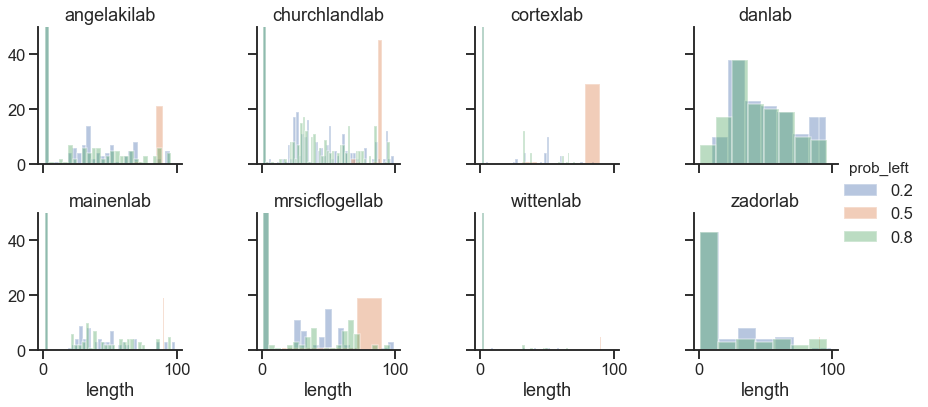

In [98]:
g = sns.FacetGrid(df2, col="session_lab", hue="prob_left", col_wrap=4, ylim=[0,50])
g.map(sns.distplot, "length", rug=False, kde=False, hist=True).set_titles("{col_name}").add_legend()

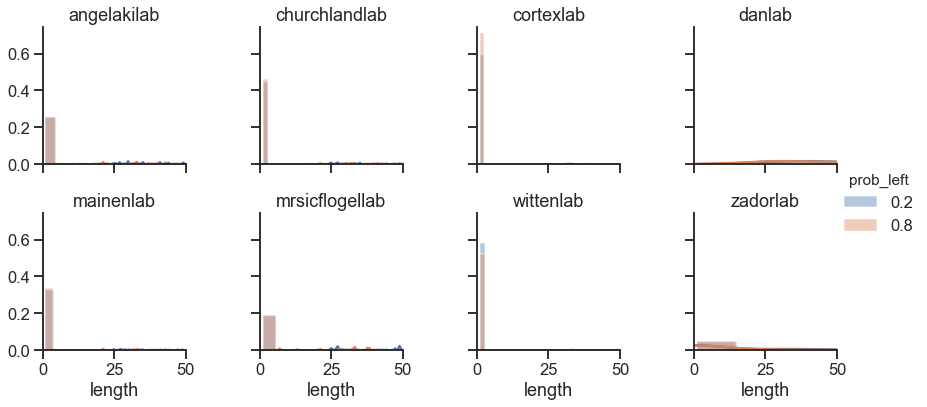

In [97]:
# dont show 0.5 for scale
g = sns.FacetGrid(df3, col="session_lab", hue="prob_left", col_wrap=4, xlim=[0, 50])
g.map(sns.distplot, "length",hist=True).set_titles("{col_name}").add_legend()
